# Create 

In [1]:
# Add any possible locations of amr-wind-frontend here
amrwindfedirs = ['/projects/wind_uq/lcheung/amrwind-frontend/',
                 '/ccs/proj/cfd162/lcheung/amrwind-frontend/']
import sys, os, shutil
for x in amrwindfedirs: sys.path.insert(1, x)

# Load the libraries
import amrwind_frontend as amrwind
import matplotlib.pyplot    as plt

import numpy as np

# Make all plots inline 
%matplotlib inline

In [2]:
# Start the AMR-Wind case
case = amrwind.MyApp.init_nogui()

In [3]:
smallsetup = './Offshore_Stable_Precursor_Coarse.inp'
bigsetup   = './Offshore_HighWS_LowTI_Precursor_20kmX20km.inp'

In [4]:
# Load the starting point
case.loadAMRWindInput(smallsetup)

CANNOT update: ABLMeanBoussinesq use forcechange=True in setval()


OrderedDict()

In [5]:
# Change the domain size
prob_lo = case.getAMRWindInput('geometry.prob_lo')
prob_hi = case.getAMRWindInput('geometry.prob_hi')
n_cell  = case.getAMRWindInput('amr.n_cell')

# Expand prob_hi
case.setAMRWindInput('geometry.prob_hi', [2*10240.0, 2*10240.0, prob_hi[2]])
case.setAMRWindInput('amr.n_cell',       [4*1024,    4*1024,    n_cell[2]])

print(prob_lo)
print(case.getAMRWindInput('geometry.prob_hi'))
print(case.getAMRWindInput('amr.n_cell'))

[0.0, 0.0, 0.0]
[20480.0, 20480.0, 960.0]
[4096, 4096, 192]


In [6]:
# Change the wind direction
# Set the wind speed and direction
case.setAMRWindInput('useWSDir', True)                           # Allows you to specify wind speed + wind direction 
case.ABL_calculateWDirWS()
WS = case.getAMRWindInput('ABL_windspeed') 
print(WS)

case.setAMRWindInput('ABL_windspeed',  WS, forcechange=True)     # Wind speed, unites m/s VARY THIS
case.setAMRWindInput('ABL_winddir',   225, forcechange=True)     # Wind direction of 225 degrees, from S-W
case.ABL_calculateWindVector()
print(case.getAMRWindInput('ABL_velocity'))

11.5
[8.131727983645296, 8.131727983645296, 0.0]


In [7]:
# Change the ABL output frequency
case.setAMRWindInput('ABL.stats_output_frequency',  10)

# Change the checkpoint interval
case.setAMRWindInput('time.checkpoint_interval', 1000)
case.setAMRWindInput('io.restart_file', None)

In [8]:
# Delete all old sampling planes from precursor
case.listboxpopupwindict['listboxsampling'].deleteall()
case.listboxpopupwindict['listboxpostprosetup'].deleteall()
print(case.listboxpopupwindict['listboxsampling'].getitemlist())
print(case.listboxpopupwindict['listboxpostprosetup'].getitemlist())

[]
[]


In [9]:
samplePlanePostPro = case.get_default_postprosetupdict()
samplePlanePostPro['postprocessing_setup_name'] = 'samplePlane_'
samplePlanePostPro['postprocessing_setup_type'] = 'Sampling'
samplePlanePostPro['postprocessing_setup_output_frequency'] =  100
samplePlanePostPro['postprocessing_setup_fields']           =  ['velocity','tke']
case.add_postprosetup(samplePlanePostPro, verbose=True)

postprocessing_setup_name: 'samplePlane_'
postprocessing_setup_type: 'Sampling'
postprocessing_setup_output_frequency: 100
postprocessing_setup_fields: ['velocity', 'tke']
postprocessing_setup_averaging_window: None
postprocessing_setup_averaging_start_time: None
postprocessing_setup_averaging_stop_time: None


In [10]:
samplingcsv="""
# CSV file should have columns withturbinescsv=
# name, type, upstream, downstream, lateral, below, above, n1, n2, options
name,   type,     upstream, downstream, lateral, below, above, n1, n2, options
p_hub,  hubheight, 0,   0,   0,       120,  120,  11, 11, usedx:40 units:meter center:specified centerx:100 centery:100 centerz:30 wholedomain:1 noffsets:2 outputto:samplePlane_
"""

case.setAMRWindInput('sampling_csvtextbox', samplingcsv)
case.setAMRWindInput('sampling_deleteprev', True)
case.sampling_createAllProbes(verbose=True)
#print(case.listboxpopupwindict['listboxsampling'].getitemlist())

{'sampling_outputto': ['samplePlane_'], 'sampling_name': 'Farm_p_hub', 'sampling_type': 'PlaneSampler', 'sampling_p_num_points': [513, 513], 'sampling_p_origin': array([ 0.,  0., 30.]), 'sampling_p_axis1': array([20480.,     0.,     0.]), 'sampling_p_axis2': array([    0., 20480.,     0.]), 'sampling_p_normal': array([0., 0., 1.]), 'sampling_p_offsets': '0.0 120.0 240.0'}
sampling_outputto: ['samplePlane_']
sampling_name: 'Farm_p_hub'
sampling_type: 'PlaneSampler'
sampling_p_num_points: [513, 513]
sampling_p_origin: array([ 0.,  0., 30.])
sampling_p_axis1: array([20480.,     0.,     0.])
sampling_p_axis2: array([    0., 20480.,     0.])
sampling_p_normal: array([0., 0., 1.])
sampling_p_offsets: '0.0 120.0 240.0'


In [11]:
# set up met masts
metmastpprosetup = case.get_default_postprosetupdict()
metmastpprosetup['postprocessing_setup_name'] = 'metmast_'
metmastpprosetup['postprocessing_setup_type'] = 'Sampling'
metmastpprosetup['postprocessing_setup_output_frequency'] =  1
metmastpprosetup['postprocessing_setup_fields']           =  ['velocity']
case.add_postprosetup(metmastpprosetup, verbose=True)

sampledict = case.get_default_samplingdict()
sampledict['sampling_name']     = 'metmast_T1'
sampledict['sampling_outputto'] = 'metmast_'
sampledict['sampling_type']     = 'LineSampler'
sampledict['sampling_l_num_points'] = 150
sampledict['sampling_l_start']      = [ 2160, 1000, 0]
sampledict['sampling_l_end']        = [ 2160, 1000, 0] + np.array([0, 0, 500])
case.add_sampling(sampledict, verbose=False)

postprocessing_setup_name: 'metmast_'
postprocessing_setup_type: 'Sampling'
postprocessing_setup_output_frequency: 1
postprocessing_setup_fields: ['velocity']
postprocessing_setup_averaging_window: None
postprocessing_setup_averaging_start_time: None
postprocessing_setup_averaging_stop_time: None


In [12]:
# Estimate mesh size
case.estimateMeshSize(verbose=False)

ESTIMATED MESH SIZE
   Level       Ncells                      Cell Size
       0   3221225472                5.0 x 5.0 x 5.0
  TOTAL:   3221225472


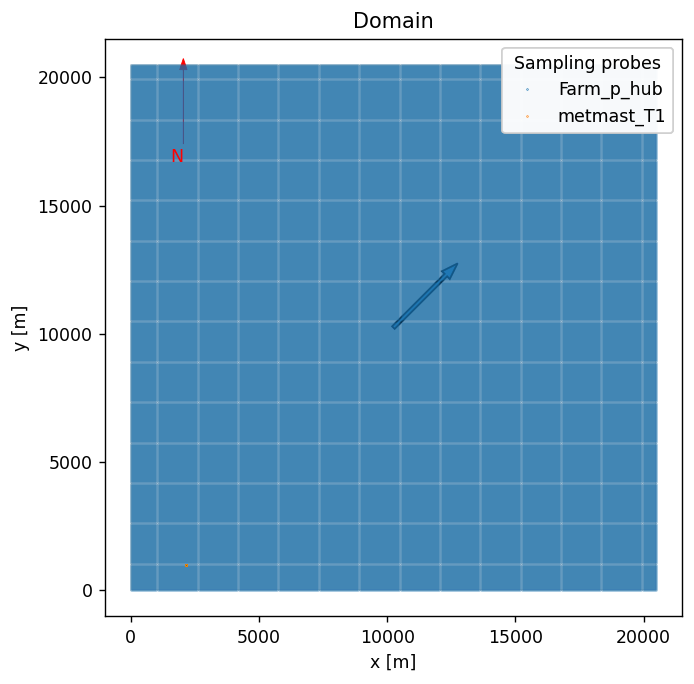

In [13]:
fig, ax = plt.subplots(figsize=(6,6), facecolor='w', dpi=125)

# Set any additional items to plot
case.popup_storteddata['plotdomain']['plot_refineboxes']     = case.listboxpopupwindict['listboxtagging'].getitemlist()
case.popup_storteddata['plotdomain']['plot_sampleprobes']    = case.listboxpopupwindict['listboxsampling'].getitemlist() #['p_hub']
case.popup_storteddata['plotdomain']['plot_chooseview']      = 'XY' 
case.popup_storteddata['plotdomain']['plot_sampleprobes_style'] = "{'markersize':0.1, 'marker':'.', 'linestyle':'None'}"
case.plotDomain(ax=ax)

Text(0.5, 1.0, 'Initial Temp. Profile')

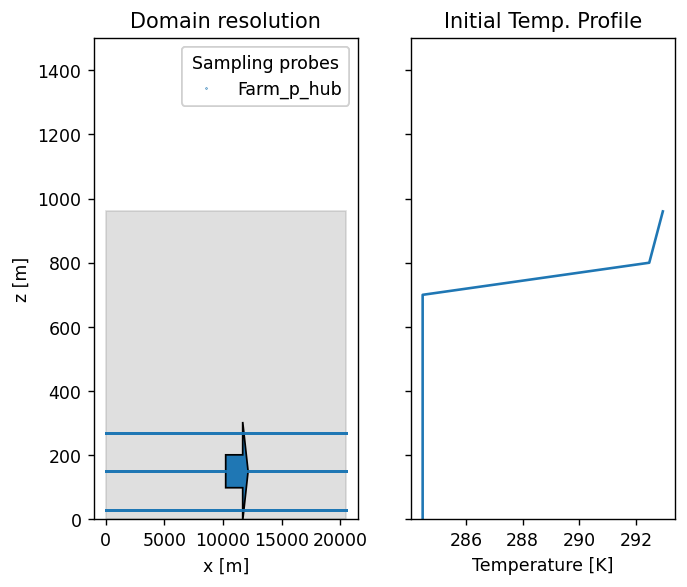

In [14]:
fig, axs = plt.subplots(1,2, figsize=(6,5), facecolor='w', dpi=125, sharey=True)

# Set any additional items to plot
case.popup_storteddata['plotdomain']['plot_refineboxes']     = case.listboxpopupwindict['listboxtagging'].getitemlist()
case.popup_storteddata['plotdomain']['plot_sampleprobes']    = ['Farm_p_hub']
case.popup_storteddata['plotdomain']['plot_chooseview']      = 'XZ' 
#case.popup_storteddata['plotdomain']['plot_refineboxes']     = ['box1', 'box2', 'box3'] 
case.plotDomain(ax=axs[0])
axs[0].set_title('Domain resolution')
axs[0].axis('auto')
axs[0].set_ylim([0,960])

case.plotGenericProfile('ABL.temperature_values', 'ABL.temperature_heights', ax=axs[1])
axs[1].set_ylim([0,1500])
#axs[1].axis('scaled')
axs[1].set_xlabel('Temperature [K]')
axs[1].set_title('Initial Temp. Profile')

In [15]:
# Write the input file
print(case.writeAMRWindInput(bigsetup))

# --- Simulation time control parameters ---
time.stop_time                           = 35000.0             # Max (simulated) time to evolve [s]
time.max_step                            = -1                  
time.fixed_dt                            = 0.25                # Fixed timestep size (in seconds). If negative, then time.cfl is used
time.checkpoint_interval                 = 1000                
incflo.physics                           = ABL                 # List of physics models to include in simulation.
incflo.verbose                           = 3                   
io.check_file                            = chk                 
incflo.use_godunov                       = true                
incflo.godunov_type                      = weno_z              
turbulence.model                         = OneEqKsgsM84        
TKE.source_terms                         = KsgsM84Src          
nodal_proj.mg_rtol                       = 1e-06               
nodal_proj.mg_atol             